In [ ]:
!pip install -U featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.7/538.7 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.7/230.7 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 39.9 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-940194b7-5075-71c4-8c9b-b043fb6559ef)


In [ ]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karmakarabhishek5","key":"36b4a526001d0aea0dbb0308eec30991"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle datasets download -d hsankesara/flickr-image-dataset

100% 8.16G/8.16G [01:11<00:00, 142MB/s]
100% 8.16G/8.16G [01:11<00:00, 123MB/s]


In [ ]:
!ls

flickr-image-dataset.zip  kaggle.json  sample_data


In [ ]:
!unzip flickr-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5354911151.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

In [ ]:
!ls

flickr30k_images  flickr-image-dataset.zip  kaggle.json  sample_data


In [ ]:
# cd flickr30k_images/flickr30k_images

In [ ]:
# cd -

In [ ]:
pwd # /content/flickr30k_images/flickr30k_images

'/content'

In [ ]:
!ls

flickr30k_images  flickr-image-dataset.zip  kaggle.json  sample_data


In [ ]:
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=9593e747a2d668a5954922e4c9d92b27fff3d35f6c5a35ec001f342483236132
  Stored in directory: /root/.cache/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano


In [ ]:
# !pip install mpu

# Downloading the Skip-Thought Model

In [ ]:
import os

print ('Downloading Skip-Thought Model ...........')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/dictionary.txt')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/utable.npy')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/btable.npy')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/uni_skip.npz')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/uni_skip.npz.pkl')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/bi_skip.npz')
os.system('wget http://www.cs.toronto.edu/~rkiros/models/bi_skip.npz.pkl')

print ('Download Completed ............')

Download Completed ............


In [ ]:
!pwd

/content


In [ ]:
import os

import theano
import theano.tensor as tensor

import pickle as pkl
import numpy
import copy
import nltk
nltk.download('punkt')

from collections import OrderedDict, defaultdict
from scipy.linalg import norm
from nltk.tokenize import word_tokenize

profile = False

#-----------------------------------------------------------------------------#
# Specify model and table locations here
#-----------------------------------------------------------------------------#
path_to_models = '/content/'
path_to_tables = '/content/'
#-----------------------------------------------------------------------------#

path_to_umodel = path_to_models + 'uni_skip.npz'
path_to_bmodel = path_to_models + 'bi_skip.npz'


def load_model():
    """
    Load the model with saved tables
    """
    # Load model options
    print('Loading model parameters...')
    with open('%s.pkl' % path_to_umodel, 'rb') as f:
        uoptions = pkl.load(f)
    with open('%s.pkl' % path_to_bmodel, 'rb') as f:
        boptions = pkl.load(f)

    # Load parameters
    uparams = init_params(uoptions)
    uparams = load_params(path_to_umodel, uparams)
    utparams = init_tparams(uparams)
    bparams = init_params_bi(boptions)
    bparams = load_params(path_to_bmodel, bparams)
    btparams = init_tparams(bparams)

    # Extractor functions
    print('Compiling encoders...')
    embedding, x_mask, ctxw2v = build_encoder(utparams, uoptions)
    f_w2v = theano.function([embedding, x_mask], ctxw2v, name='f_w2v')
    embedding, x_mask, ctxw2v = build_encoder_bi(btparams, boptions)
    f_w2v2 = theano.function([embedding, x_mask], ctxw2v, name='f_w2v2')

    # Tables
    print('Loading tables...')
    utable, btable = load_tables()

    # Store everything we need in a dictionary
    print('Packing up...')
    model = {}
    model['uoptions'] = uoptions
    model['boptions'] = boptions
    model['utable'] = utable
    model['btable'] = btable
    model['f_w2v'] = f_w2v
    model['f_w2v2'] = f_w2v2

    return model


def load_tables():
    """
    Load the tables
    """
    words = []
    utable = numpy.load(file = path_to_tables + 'utable.npy', allow_pickle=True, encoding='latin1')
    btable = numpy.load(file = path_to_tables + 'btable.npy',allow_pickle=True,  encoding='latin1')
    f = open(path_to_tables + 'dictionary.txt', 'rb')
    for line in f:
        words.append(line.decode('utf-8').strip())
    f.close()
    utable = OrderedDict(list(zip(words, utable)))
    btable = OrderedDict(list(zip(words, btable)))
    return utable, btable


def encode(model, X, use_norm=True, verbose=True, batch_size=128, use_eos=False):
    """
    Encode sentences in the list X. Each entry will return a vector
    """
    # first, do preprocessing

    # print()
    # print()
    # print()
    # print("------Encode sentences in the list X. Each entry will return a vector---------")
    # print(X)
    X = preprocess(X)
    # print("------After preprocess---------")

    # word dictionary and init
    d = defaultdict(lambda: 0)
    for w in list(model['utable'].keys()):
        d[w] = 1
    ufeatures = numpy.zeros((len(X), model['uoptions']['dim']), dtype='float32')
    bfeatures = numpy.zeros((len(X), 2 * model['boptions']['dim']), dtype='float32')

    # length dictionary
    ds = defaultdict(list)
    captions = [s.split() for s in X]
    for i, s in enumerate(captions):
        ds[len(s)].append(i)

    # Get features. This encodes by length, in order to avoid wasting computation
    for k in list(ds.keys()):
        if verbose:
            print(k)
        numbatches = len(ds[k]) // batch_size + 1
        for minibatch in range(numbatches):
            caps = ds[k][minibatch::numbatches]

            if use_eos:
                uembedding = numpy.zeros((k + 1, len(caps), model['uoptions']['dim_word']), dtype='float32')
                bembedding = numpy.zeros((k + 1, len(caps), model['boptions']['dim_word']), dtype='float32')
            else:
                uembedding = numpy.zeros((k, len(caps), model['uoptions']['dim_word']), dtype='float32')
                bembedding = numpy.zeros((k, len(caps), model['boptions']['dim_word']), dtype='float32')
            for ind, c in enumerate(caps):
                caption = captions[c]
                for j in range(len(caption)):
                    if d[caption[j]] > 0:
                        uembedding[j, ind] = model['utable'][caption[j]]
                        bembedding[j, ind] = model['btable'][caption[j]]
                    else:
                        uembedding[j, ind] = model['utable']['UNK']
                        bembedding[j, ind] = model['btable']['UNK']
                if use_eos:
                    uembedding[-1, ind] = model['utable']['<eos>']
                    bembedding[-1, ind] = model['btable']['<eos>']
            if use_eos:
                uff = model['f_w2v'](uembedding, numpy.ones((len(caption) + 1, len(caps)), dtype='float32'))
                bff = model['f_w2v2'](bembedding, numpy.ones((len(caption) + 1, len(caps)), dtype='float32'))
            else:
                uff = model['f_w2v'](uembedding, numpy.ones((len(caption), len(caps)), dtype='float32'))
                bff = model['f_w2v2'](bembedding, numpy.ones((len(caption), len(caps)), dtype='float32'))
            if use_norm:
                for j in range(len(uff)):
                    uff[j] /= norm(uff[j])
                    bff[j] /= norm(bff[j])
            for ind, c in enumerate(caps):
                ufeatures[c] = uff[ind]
                bfeatures[c] = bff[ind]

    features = numpy.c_[ufeatures, bfeatures]
    return features


def preprocess(text):
    """
    Preprocess text for encoder
    """
    X = []
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    for t in text:
        sents = sent_detector.tokenize(t)
        result = ''
        for s in sents:
            tokens = word_tokenize(s)
            result += ' ' + ' '.join(tokens)
        X.append(result)
    return X


def nn(model, text, vectors, query, k=5):
    """
    Return the nearest neighbour sentences to query
    text: list of sentences
    vectors: the corresponding representations for text
    query: a string to search
    """
    qf = encode(model, [query])
    qf /= norm(qf)
    scores = numpy.dot(qf, vectors.T).flatten()
    sorted_args = numpy.argsort(scores)[::-1]
    sentences = [text[a] for a in sorted_args[:k]]
    print(('QUERY: ' + query))
    print('NEAREST: ')
    for i, s in enumerate(sentences):
        print((s, sorted_args[i]))


def word_features(table):
    """
    Extract word features into a normalized matrix
    """
    features = numpy.zeros((len(table), 620), dtype='float32')
    keys = list(table.keys())
    for i in range(len(table)):
        f = table[keys[i]]
        features[i] = f / norm(f)
    return features


def nn_words(table, wordvecs, query, k=10):
    """
    Get the nearest neighbour words
    """
    keys = list(table.keys())
    qf = table[query]
    scores = numpy.dot(qf, wordvecs.T).flatten()
    sorted_args = numpy.argsort(scores)[::-1]
    words = [keys[a] for a in sorted_args[:k]]
    print(('QUERY: ' + query))
    print('NEAREST: ')
    for i, w in enumerate(words):
        print(w)


def _p(pp, name):
    """
    make prefix-appended name
    """
    return '%s_%s' % (pp, name)


def init_tparams(params):
    """
    initialize Theano shared variables according to the initial parameters
    """
    tparams = OrderedDict()
    for kk, pp in list(params.items()):
        tparams[kk] = theano.shared(params[kk], name=kk)
    return tparams


def load_params(path, params):
    """
    load parameters
    """
    pp = numpy.load(path)
    for kk, vv in list(params.items()):
        if kk not in pp:
            warnings.warn('%s is not in the archive' % kk)
            continue
        params[kk] = pp[kk]
    return params


# layers: 'name': ('parameter initializer', 'feedforward')
layers = {'gru': ('param_init_gru', 'gru_layer')}


def get_layer(name):
    fns = layers[name]
    return (eval(fns[0]), eval(fns[1]))


def init_params(options):
    """
    initialize all parameters needed for the encoder
    """
    params = OrderedDict()

    # embedding
    params['Wemb'] = norm_weight(options['n_words_src'], options['dim_word'])

    # encoder: GRU
    params = get_layer(options['encoder'])[0](options, params, prefix='encoder',
                                              nin=options['dim_word'], dim=options['dim'])
    return params


def init_params_bi(options):
    """
    initialize all paramters needed for bidirectional encoder
    """
    params = OrderedDict()

    # embedding
    params['Wemb'] = norm_weight(options['n_words_src'], options['dim_word'])

    # encoder: GRU
    params = get_layer(options['encoder'])[0](options, params, prefix='encoder',
                                              nin=options['dim_word'], dim=options['dim'])
    params = get_layer(options['encoder'])[0](options, params, prefix='encoder_r',
                                              nin=options['dim_word'], dim=options['dim'])
    return params


def build_encoder(tparams, options):
    """
    build an encoder, given pre-computed word embeddings
    """
    # word embedding (source)
    embedding = tensor.tensor3('embedding', dtype='float32')
    x_mask = tensor.matrix('x_mask', dtype='float32')

    # encoder
    proj = get_layer(options['encoder'])[1](tparams, embedding, options,
                                            prefix='encoder',
                                            mask=x_mask)
    ctx = proj[0][-1]

    return embedding, x_mask, ctx


def build_encoder_bi(tparams, options):
    """
    build bidirectional encoder, given pre-computed word embeddings
    """
    # word embedding (source)
    embedding = tensor.tensor3('embedding', dtype='float32')
    embeddingr = embedding[::-1]
    x_mask = tensor.matrix('x_mask', dtype='float32')
    xr_mask = x_mask[::-1]

    # encoder
    proj = get_layer(options['encoder'])[1](tparams, embedding, options,
                                            prefix='encoder',
                                            mask=x_mask)
    projr = get_layer(options['encoder'])[1](tparams, embeddingr, options,
                                             prefix='encoder_r',
                                             mask=xr_mask)

    ctx = tensor.concatenate([proj[0][-1], projr[0][-1]], axis=1)

    return embedding, x_mask, ctx


# some utilities
def ortho_weight(ndim):
    W = numpy.random.randn(ndim, ndim)
    u, s, v = numpy.linalg.svd(W)
    return u.astype('float32')


def norm_weight(nin, nout=None, scale=0.1, ortho=True):
    if nout == None:
        nout = nin
    if nout == nin and ortho:
        W = ortho_weight(nin)
    else:
        W = numpy.random.uniform(low=-scale, high=scale, size=(nin, nout))
    return W.astype('float32')


def param_init_gru(options, params, prefix='gru', nin=None, dim=None):
    """
    parameter init for GRU
    """
    if nin == None:
        nin = options['dim_proj']
    if dim == None:
        dim = options['dim_proj']
    W = numpy.concatenate([norm_weight(nin, dim),
                           norm_weight(nin, dim)], axis=1)
    params[_p(prefix, 'W')] = W
    params[_p(prefix, 'b')] = numpy.zeros((2 * dim,)).astype('float32')
    U = numpy.concatenate([ortho_weight(dim),
                           ortho_weight(dim)], axis=1)
    params[_p(prefix, 'U')] = U

    Wx = norm_weight(nin, dim)
    params[_p(prefix, 'Wx')] = Wx
    Ux = ortho_weight(dim)
    params[_p(prefix, 'Ux')] = Ux
    params[_p(prefix, 'bx')] = numpy.zeros((dim,)).astype('float32')

    return params


def gru_layer(tparams, state_below, options, prefix='gru', mask=None, **kwargs):
    """
    Forward pass through GRU layer
    """
    nsteps = state_below.shape[0]
    if state_below.ndim == 3:
        n_samples = state_below.shape[1]
    else:
        n_samples = 1

    dim = tparams[_p(prefix, 'Ux')].shape[1]

    if mask == None:
        mask = tensor.alloc(1., state_below.shape[0], 1)

    def _slice(_x, n, dim):
        if _x.ndim == 3:
            return _x[:, :, n * dim:(n + 1) * dim]
        return _x[:, n * dim:(n + 1) * dim]

    state_below_ = tensor.dot(state_below, tparams[_p(prefix, 'W')]) + tparams[_p(prefix, 'b')]
    state_belowx = tensor.dot(state_below, tparams[_p(prefix, 'Wx')]) + tparams[_p(prefix, 'bx')]
    U = tparams[_p(prefix, 'U')]
    Ux = tparams[_p(prefix, 'Ux')]

    def _step_slice(m_, x_, xx_, h_, U, Ux):
        preact = tensor.dot(h_, U)
        preact += x_

        r = tensor.nnet.sigmoid(_slice(preact, 0, dim))
        u = tensor.nnet.sigmoid(_slice(preact, 1, dim))

        preactx = tensor.dot(h_, Ux)
        preactx = preactx * r
        preactx = preactx + xx_

        h = tensor.tanh(preactx)

        h = u * h_ + (1. - u) * h
        h = m_[:, None] * h + (1. - m_)[:, None] * h_

        return h

    seqs = [mask, state_below_, state_belowx]
    _step = _step_slice

    rval, updates = theano.scan(_step,
                                sequences=seqs,
                                outputs_info=[tensor.alloc(0., n_samples, dim)],
                                non_sequences=[tparams[_p(prefix, 'U')],
                                               tparams[_p(prefix, 'Ux')]],
                                name=_p(prefix, '_layers'),
                                n_steps=nsteps,
                                profile=profile,
                                strict=True)
    rval = [rval]
    return rval

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# encode(model, obj.img_captions['1000092795.jpg'])
# print(obj.encoded_captions['1000092795.jpg'])
# print(obj.encoded_captions['1000092795.jpg'].size())

# Text-to-IMage

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from tqdm import tqdm
from torch.autograd import Variable
from torch.utils.data import Dataset
import pandas as pd
from cv2 import resize

# Each batch will have 3 things : true image, its captions(5), and false image(real image but image
# corresponding to an incorrect caption).
# Discriminator is trained in such a way that true_img + caption corresponds to a real example and
# false_img + caption corresponds to a fake example.

In [ ]:
data_dir = '/content/'

In [ ]:
class Text2ImageDataset(Dataset):

    # self.load_flower_dataset() has been renamed to self.load_flickr_dataset()
    def __init__(self, data_dir='/content/'):
        self.data_dir = data_dir
        self.load_flickr_dataset()

    def load_flickr_dataset(self):
        # It will return two things : a list of image file names, 
        # a dictionary of 5 captions per image with image file name as the key of the dictionary and 5 values(captions) for each key.

        print ("------------------  Loading images  ------------------")

        df = pd.read_csv("/content/flickr30k_images/flickr30k_images/results.csv", sep="|")
        df = df.rename(columns=lambda x: x.strip())
        self.img_files = list(df['image_name'].unique())
        #--------------------------------------------------------------------------------------------------------------------------------------
        # NEED TO DELETE THIS CODE LATER
        # NEED TO DELETE THIS CODE LATER
        # NEED TO DELETE THIS CODE LATER
        # NEED TO DELETE THIS CODE LATER
        self.img_files = self.img_files[0:10] 
        #--------------------------------------------------------------------------------------------------------------------------------------

        print ('Total number of images : {}'.format(len(self.img_files)))


        print ("------------------  Loading captions  ----------------")
        self.img_captions = {}
        for label in self.img_files:
          cap_list = list(df.loc[df["image_name"] == label, "comment"].values)
          res = " ".join([str(item) for item in cap_list])
          ll = []
          ll.append(res)
          self.img_captions[label] = ll
          # self.img_captions[label] = list(df.loc[df["image_name"] == label, "comment"].values)
          
          del cap_list
          del res
          del ll

        print ('Total number of captions for images : {}'.format(len(self.img_captions)))


        print ("---------------  Loading Skip-thought Model  ---------------")
        model = load_model()
        self.encoded_captions = {}

        print ("------------  Encoding of image captions STARTED  ------------")
        for img_file in self.img_captions:
            self.encoded_captions[img_file] = encode(model, self.img_captions[img_file])
            self.encoded_captions[img_file] = torch.from_numpy(self.encoded_captions[img_file])
            # print (type(self.encoded_captions[img_file]))
            # convert it to torch tensor if it is a numpy array

        print ("-------------  Encoding of image captions DONE  -------------")

        del df      
       
    def read_image(self, image_file_name):
        image = Image.open(os.path.join(self.data_dir, 'flickr30k_images/flickr30k_images/' + image_file_name))
        image = np.asarray(image)
        # check its shape and reshape it to (64, 64, 3)
        image = resize(image, (64, 64))
        return image

    def get_false_img(self, index):
        false_img_id = np.random.randint(len(self.img_files))
        if false_img_id != index:
            return self.img_files[false_img_id]

        return self.get_false_img(index)

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, index):
        sample = {}
        sample['true_imgs'] = torch.FloatTensor(self.read_image(self.img_files[index]))
        sample['false_imgs'] = torch.FloatTensor(self.read_image(self.get_false_img(index)))
        sample['true_embed'] = torch.FloatTensor(self.encoded_captions[self.img_files[index]])

        return sample       

In [ ]:
# print(obj.img_captions['1000092795.jpg'])
# print(obj.encoded_captions['1000092795.jpg'])
# print(obj.encoded_captions['1000092795.jpg'].size())

In [ ]:
obj = Text2ImageDataset(data_dir)

------------------  Loading images  ------------------
Total number of images : 10
------------------  Loading captions  ----------------
Total number of captions for images : 10
---------------  Loading Skip-thought Model  ---------------
Loading model parameters...
Compiling encoders...


Loading tables...
Packing up...
------------  Encoding of image captions STARTED  ------------
57
50
57
63
57
55
57
62
63
55
-------------  Encoding of image captions DONE  -------------


In [ ]:
for k in obj.encoded_captions:
  obj.encoded_captions[k] = np.squeeze(obj.encoded_captions[k])

In [ ]:
print(obj.img_captions['1000092795.jpg'])
print(obj.encoded_captions['1000092795.jpg'])
print(obj.encoded_captions['1000092795.jpg'].size())

[' Two young guys with shaggy hair look at their hands while hanging out in the yard .  Two young , White males are outside near many bushes .  Two men in green shirts are standing in a yard .  A man in a blue shirt standing in a garden .  Two friends enjoy time spent together .']
tensor([ 0.0024, -0.0171, -0.0047,  ..., -0.0121,  0.0096,  0.0063])
torch.Size([4800])


In [ ]:
# import mpu
# mpu.io.write('cap.pickle', obj.img_captions)
# unserialized_data = mpu.io.read('cap.pickle')
# unserialized_data

In [ ]:
from torch.utils.data import DataLoader
import os
import torch
import numpy as np

data_loader = DataLoader(obj, batch_size=1, shuffle=True)

# GENERATOR

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [ ]:
class Generator(nn.Module):
    def __init__(self, batch_size = 1, img_size = 64, z_dim = 100, text_embed_dim = 4800, text_reduced_dim = 1024):
        super(Generator, self).__init__()

        self.img_size = img_size
        self.z_dim = z_dim
        self.text_embed_dim = text_embed_dim
        self.text_reduced_dim = text_reduced_dim

        self.text_reduced_dim = nn.Linear(text_embed_dim, text_reduced_dim).cuda() # omit this .cuda() if causes any error
        self.concat = nn.Linear(z_dim + text_reduced_dim, 64 * 8 * 4 * 4).cuda()
        
        # Defining the generator network architecture
        self.d_net = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        ).cuda()


    def forward(self, text, z):
        """ Given a caption embedding and latent variable z(noise), generate an image
        Arguments
        ---------
        text : torch.FloatTensor
            Output of the skipthought embedding model for the caption
            text.size() = (batch_size, text_embed_dim)
        z : torch.FloatTensor
            Latent variable or noise
            z.size() = (batch_size, z_dim)
        --------
        Returns
        --------
        output : An image of shape (64, 64, 3)
        """
        reduced_text = self.text_reduced_dim(text.cuda())  # (batch_size, reduced_text_dim)
        # print("------------Z Size----------->", z.size())
        # print("---Text Reduced Size--------->", reduced_text.size())
        concat = torch.cat((reduced_text, z.cuda()), 1)  # (batch_size, reduced_text_dim + z_dim)
        concat = self.concat(concat)  # (batch_size, 64*8*4*4)
        concat = concat.view(-1, 4, 4, 64 * 8)  # (batch_size, 4, 4, 64*8)
        concat = concat.permute(0, 3, 1, 2) # (batch_size, 512, 4, 4)
        d_net_out = self.d_net(concat)  # (batch_size, 64, 64, 3)
        d_net_out = d_net_out.permute(0, 2, 3, 1) #(batch_size, 64, 64, 3)
        output = d_net_out / 2. + 0.5   # (batch_size, 64, 64, 3)

        return output        

# Discriminator

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, batch_size = 1, img_size = 64, text_embed_dim = 4800, text_reduced_dim = 1024):
        super(Discriminator, self).__init__()

        self.batch_size = batch_size
        self.img_size = img_size
        self.in_channels = 3 # as its an RGB image img_size[2]
        self.text_embed_dim = text_embed_dim
        self.text_reduced_dim = text_reduced_dim

        # Defining the discriminator network architecture
        self.d_net = nn.Sequential(
            nn.Conv2d(self.in_channels, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True)).cuda()

        # output_dim = (batch_size, 4, 4, 512)
        # text.size() = (batch_size, text_embed_dim)

        # Defining a linear layer to reduce the dimensionality of caption embedding
        # from text_embed_dim to text_reduced_dim
        
        # self.text_reduced_dim = nn.Linear(self.text_embed_dim, self.text_reduced_dim)
        # print(self.text_reduced_dim)
        # print(type(self.text_reduced_dim))

        self.cat_net = nn.Sequential(
            nn.Conv2d(512 + self.text_reduced_dim, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True)).cuda()

        self.text_reduced_dim = nn.Linear(self.text_embed_dim, self.text_reduced_dim).cuda()
        self.linear = nn.Linear(2 * 2 * 512, 1).cuda()

    def forward(self, image, text):
        """ Given the image and its caption embedding, predict whether the image
        is real or fake.
        Arguments
        ---------
        image : torch.FloatTensor
            image.size() = (batch_size, 64, 64, 3)
        text : torch.FloatTensor
            Output of the skipthought embedding model for the caption
            text.size() = (batch_size, text_embed_dim)
        --------
        Returns
        --------
        output : Probability for the image being real/fake
        logit : Final score of the discriminator
        """

        image = image.permute(0, 3, 1, 2) # (batch_size, 3, 64, 64)
        d_net_out = self.d_net(image)  # (batch_size, 4, 4, 512)
        d_net_out = d_net_out.permute(0, 2, 3, 1) # (batch_size, 4, 4, 512)
        text_reduced = self.text_reduced_dim(text)  # (batch_size, text_reduced_dim)
        text_reduced = text_reduced.unsqueeze(1)  # (batch_size, 1, text_reduced_dim)
        text_reduced = text_reduced.unsqueeze(2)  # (batch_size, 1, 1, text_reduced_dim)
        text_reduced = text_reduced.expand(-1, 4, 4, -1)

        concat_out = torch.cat((d_net_out, text_reduced), 3)  # (1, 4, 4, 512+text_reduced_dim)

        logit = self.cat_net(concat_out.permute(0, 3, 1, 2))
        logit = logit.reshape(-1, logit.size()[1] * logit.size()[2] * logit.size()[3])
        logit = self.linear(logit)
        # concat_out = torch.view(-1, concat_out.size()[1] * concat_out.size()[2] * concat_out.size()[3])
        # concat_out = self.linear(concat_out)
        # output = F.sigmoid(logit)
        output = torch.sigmoid(logit)

        return output, logit

# Train

In [ ]:
import os
import time
import datetime
import logging
import itertools

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import functional as F
from torchvision.utils import save_image

import numpy as np
from pickle import dump
import matplotlib.pyplot as plt

In [ ]:
class GAN_CLS(object):
    def __init__(self, args, data_loader = data_loader, num_epochs = 2, batch_size = 1, log_step = 1, sample_step = 1, 
                 log_dir = 'logs', checkpoint_dir = 'checkpoints', sample_dir =  'sample', 
                 final_model = 'final_model', model_save_step = 1, dataset = '/content/flickr30k_images/flickr30k_images', 
                 img_size = 64, z_dim = 100, text_embed_dim = 4800, text_reduced_dim = 1024, learning_rate = 0.002,
                 beta1 = 0.5, beta2 = 0.999, l1_coeff = 50, resume_epoch = 0, SUPERVISED=True):
        """
        Arguments :
        ----------
        args : Arguments defined in Argument Parser
        data_loader = An instance of class DataLoader for loading our dataset in batches
        SUPERVISED :
        """

        self.data_loader = data_loader
        self.num_epochs = num_epochs
        self.batch_size = args.batch_size

        self.log_step = log_step
        self.sample_step = sample_step

        self.log_dir = log_dir
        if not os.path.exists(self.log_dir):
          os.makedirs(self.log_dir)

        self.checkpoint_dir = checkpoint_dir
        if not os.path.exists(self.checkpoint_dir):
          os.makedirs(self.checkpoint_dir)

        self.sample_dir = sample_dir
        if not os.path.exists(self.sample_dir):
          os.makedirs(self.sample_dir)

        self.final_model = final_model
        if not os.path.exists(self.final_model):
          os.makedirs(self.final_model)

        self.model_save_step = model_save_step

        self.dataset = dataset
        # self.model_name = args.model_name

        self.img_size = img_size
        self.z_dim = z_dim
        self.text_embed_dim = text_embed_dim
        self.text_reduced_dim = text_reduced_dim
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.l1_coeff = l1_coeff
        self.resume_epoch = resume_epoch
        self.SUPERVISED = SUPERVISED

        # Logger setting
        log_name = datetime.datetime.now().strftime('%Y-%m-%d')+'.log'
        self.logger = logging.getLogger('__name__')
        self.logger.setLevel(logging.INFO)
        self.formatter = logging.Formatter('%(asctime)s:%(levelname)s:%(message)s')
        # self.file_handler = logging.FileHandler(self.log_dir)
        self.file_handler = logging.FileHandler(os.path.join(self.log_dir, log_name))
        self.file_handler.setFormatter(self.formatter)
        self.logger.addHandler(self.file_handler)

        self.build_model()

        
    def build_model(self):
        """ A function of defining following instances :
        -----  Generator
        -----  Discriminator
        -----  Optimizer for Generator
        -----  Optimizer for Discriminator
        -----  Defining Loss functions
        """

        # ---------------------------------------------------------------------
        #						1. Network Initialization
        # ---------------------------------------------------------------------
        self.gen = Generator(batch_size=self.batch_size,
                             img_size=self.img_size,
                             z_dim=self.z_dim,
                             text_embed_dim=self.text_embed_dim,
                             text_reduced_dim=self.text_reduced_dim)

        self.disc = Discriminator(batch_size=self.batch_size,
                                  img_size=self.img_size,
                                  text_embed_dim=self.text_embed_dim,
                                  text_reduced_dim=self.text_reduced_dim)

        self.gen_optim = optim.Adam(self.gen.parameters(),
                                    lr=self.learning_rate,
                                    betas=(self.beta1, self.beta2))

        self.disc_optim = optim.Adam(self.disc.parameters(),
                                     lr=self.learning_rate,
                                     betas=(self.beta1, self.beta2))

        self.cls_gan_optim = optim.Adam(itertools.chain(self.gen.parameters(),
                                                        self.disc.parameters()),
                                        lr=self.learning_rate,
                                        betas=(self.beta1, self.beta2))

        print ('-------------  Generator Model Info  ---------------')
        self.print_network(self.gen, 'G')
        print ('------------------------------------------------')

        print ('-------------  Discriminator Model Info  ---------------')
        self.print_network(self.disc, 'D')
        print ('------------------------------------------------')

        self.gen.cuda()
        self.disc.cuda()
        self.criterion = nn.BCELoss().cuda()
        # self.CE_loss = nn.CrossEntropyLoss().cuda()
        # self.MSE_loss = nn.MSELoss().cuda()
        self.gen.train()
        self.disc.train()


    def print_network(self, model, name):
        """ A function for printing total number of model parameters """
        num_params = 0
        for p in model.parameters():
            num_params += p.numel()

        print(model)
        print(name)
        print("Total number of parameters: {}".format(num_params))

    def load_checkpoints(self, resume_epoch):
        """Restore the trained generator and discriminator."""
        print('Loading the trained models from step {}...'.format(resume_epoch))
        G_path = os.path.join(self.checkpoint_dir, '{}-G.ckpt'.format(resume_epoch))
        D_path = os.path.join(self.checkpoint_dir, '{}-D.ckpt'.format(resume_epoch))
        self.gen.load_state_dict(torch.load(G_path, map_location=lambda storage, loc: storage))
        self.disc.load_state_dict(torch.load(D_path, map_location=lambda storage, loc: storage))

    def smooth_label(self, tensor, offset):
      return (tensor + offset)

    def dump_imgs(self, images_Array, name):
      with open('{}.pickle'.format(name), 'wb') as file:
        dump(images_Array, file)
    
    def train_model(self):

        data_loader = self.data_loader
        start_epoch = 0
        if (self.resume_epoch > 0):
            start_epoch = self.resume_epoch
            self.load_checkpoints(self.resume_epoch)

        print ('---------------  Model Training Started  ---------------')
        start_time = time.time()

        for epoch in range(start_epoch, self.num_epochs):
            for idx, batch in enumerate(data_loader):
                #print("-----------idx-----", idx, "-----------batch--------",batch)
                true_imgs = batch['true_imgs']
                true_embed = batch['true_embed']
                # print("************BATCH EMBED SIZE***************", batch['true_embed'].size())
                false_imgs = batch['false_imgs']

                real_labels = torch.ones(true_imgs.size(0))
                fake_labels = torch.zeros(true_imgs.size(0))

                smooth_real_labels = torch.FloatTensor(self.smooth_label(real_labels.numpy(), -0.1))

                true_imgs = Variable(true_imgs.float()).cuda()
                true_embed = Variable(true_embed.float()).cuda()
                false_imgs = Variable(false_imgs.float()).cuda()

                real_labels = Variable(real_labels).cuda()
                smooth_real_labels = Variable(smooth_real_labels).cuda()
                fake_labels = Variable(fake_labels).cuda()

                # ---------------------------------------------------------------
                # 					  2. Training the generator
                # ---------------------------------------------------------------
                self.gen.zero_grad()
                z = Variable(torch.randn(true_imgs.size(0), self.z_dim)).cuda()
                # print("-------------------TRUE EMbed-------->>>>>>>>>>>>", true_embed.size())
                # print("---------------------Z SIZE-------->>>>>>>>>>>>", z.size())
                # kk = np.squeeze(true_embed)
                # print("-----------------SQueezed------------>>>>>>>>>", kk.size())
                # # true_embed = np.squeeze(true_embed)
                fake_imgs = self.gen.forward(true_embed, z)
                fake_out, fake_logit = self.disc.forward(fake_imgs, true_embed)
                fake_out = Variable(fake_out.data, requires_grad=True).cuda()

                true_out, true_logit = self.disc.forward(true_imgs, true_embed)
                true_out = Variable(true_out.data, requires_grad=True).cuda()

                real_labels = real_labels.unsqueeze(1)
                g_sf = self.criterion(fake_out, real_labels)
                gen_loss = g_sf

                # gen_loss = self.criterion(fake_out, real_labels) + self.l1_coeff * nn.L1Loss(fake_imgs, true_imgs)

                gen_loss.backward()
                self.gen_optim.step()

                # ---------------------------------------------------------------
                # 					3. Training the discriminator
                # ---------------------------------------------------------------
                self.disc.zero_grad()
                false_out, false_logit = self.disc.forward(false_imgs, true_embed)
                false_out = Variable(false_out.data, requires_grad=True)

                smooth_real_labels = smooth_real_labels.unsqueeze(1)
                sr = self.criterion(true_out, smooth_real_labels)
                fake_labels = fake_labels.unsqueeze(1)
                sw = self.criterion(true_out, fake_labels)
                sf = self.criterion(false_out, smooth_real_labels)

                disc_loss =  torch.log(sr) + (torch.log(1-sw) + torch.log(1-sf ))/2 

                # disc_loss = self.criterion(true_out, smooth_real_labels) + self.criterion(fake_out, fake_labels) + self.criterion(false_out, fake_labels)

                disc_loss.backward()
                self.disc_optim.step()

                # self.cls_gan_optim.step()

                # Logging
                loss = {}
                loss['G_loss'] = gen_loss.item()
                loss['D_loss'] = disc_loss.item()

                # ---------------------------------------------------------------
                # 					4. Logging INFO into log_dir
                # ---------------------------------------------------------------
                log = ""
                if (idx + 1) % self.log_step == 0:
                    end_time = time.time() - start_time
                    end_time = datetime.timedelta(seconds=end_time)
                    log = "Elapsed [{}], Epoch [{}/{}], Idx [{}]".format(end_time, epoch + 1, self.num_epochs, idx)

                for net, loss_value in loss.items():
                    log += ", {}: {:.4f}".format(net, loss_value)
                    self.logger.info(log)
                    print (log)


                """
                # ---------------------------------------------------------------
                # 					5. Saving generated images
                # ---------------------------------------------------------------
                if (idx + 1) % self.sample_step == 0:
                    concat_imgs = torch.cat((true_imgs, fake_imgs), 2)  # ??????????
                    concat_imgs = (concat_imgs + 1) / 2                    
                    # out.clamp_(0, 1)
                    save_path = os.path.join(self.sample_dir, '{}-{}-images.jpg'.format(epoch, idx + 1))
                    self.dump_imgs((concat_imgs.cpu().detach().numpy()), save_path)

                    save_image(concat_imgs.data.cpu(), self.sample_dir, nrow=1, padding=0)
                    print ('Saved real and fake images into {}...'.format(self.sample_dir))

                """
                # ---------------------------------------------------------------
                # 				6. Saving the checkpoints & final model
                # ---------------------------------------------------------------
                if (idx + 1) % self.model_save_step == 0:                    
                    G_path = os.path.join(self.checkpoint_dir, '{}-{}-G.ckpt'.format(epoch, idx + 1))
                    D_path = os.path.join(self.checkpoint_dir, '{}-{}-D.ckpt'.format(epoch, idx + 1))
                    # G_path = os.path.join(self.checkpoint_dir, '{}-G.ckpt'.format(idx + 1))
                    # D_path = os.path.join(self.checkpoint_dir, '{}-D.ckpt'.format(idx + 1))
                    torch.save(self.gen.state_dict(), G_path)
                    torch.save(self.disc.state_dict(), D_path)
                    print('Saved model checkpoints into {}...'.format(self.checkpoint_dir))

        print ('---------------  Model Training Completed  ---------------')
        # Saving final model into final_model directory
        G_path = os.path.join(self.final_model, '{}-G.pth'.format('final'))
        D_path = os.path.join(self.final_model, '{}-D.pth'.format('final'))
        torch.save(self.gen.state_dict(), G_path)
        torch.save(self.disc.state_dict(), D_path)
        print('Saved final model into {}...'.format(self.final_model))

# Main

In [ ]:
gan = GAN_CLS(data_loader)

-------------  Generator Model Info  ---------------
Generator(
  (text_reduced_dim): Linear(in_features=4800, out_features=1024, bias=True)
  (concat): Linear(in_features=1124, out_features=8192, bias=True)
  (d_net): Sequential(
    (0): ReLU()
    (1): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (11): Tanh()
  )
)
G
Total number of parameters: 16889155
---------------------------------

In [ ]:
gan.build_model()

-------------  Generator Model Info  ---------------
Generator(
  (text_reduced_dim): Linear(in_features=4800, out_features=1024, bias=True)
  (concat): Linear(in_features=1124, out_features=8192, bias=True)
  (d_net): Sequential(
    (0): ReLU()
    (1): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (11): Tanh()
  )
)
G
Total number of parameters: 16889155
---------------------------------

In [ ]:
gan.train_model()

---------------  Model Training Started  ---------------


INFO:__name__:Elapsed [0:00:07.064172], Epoch [1/2], Idx [0], G_loss: 0.9811
INFO:__name__:Elapsed [0:00:07.064172], Epoch [1/2], Idx [0], G_loss: 0.9811, D_loss: -0.5653


Elapsed [0:00:07.064172], Epoch [1/2], Idx [0], G_loss: 0.9811
Elapsed [0:00:07.064172], Epoch [1/2], Idx [0], G_loss: 0.9811, D_loss: -0.5653


INFO:__name__:Elapsed [0:00:07.413806], Epoch [1/2], Idx [1], G_loss: 1.0732
INFO:__name__:Elapsed [0:00:07.413806], Epoch [1/2], Idx [1], G_loss: 1.0732, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:07.413806], Epoch [1/2], Idx [1], G_loss: 1.0732
Elapsed [0:00:07.413806], Epoch [1/2], Idx [1], G_loss: 1.0732, D_loss: nan


INFO:__name__:Elapsed [0:00:07.839196], Epoch [1/2], Idx [2], G_loss: 0.6789
INFO:__name__:Elapsed [0:00:07.839196], Epoch [1/2], Idx [2], G_loss: 0.6789, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:07.839196], Epoch [1/2], Idx [2], G_loss: 0.6789
Elapsed [0:00:07.839196], Epoch [1/2], Idx [2], G_loss: 0.6789, D_loss: nan


INFO:__name__:Elapsed [0:00:08.390869], Epoch [1/2], Idx [3], G_loss: 0.6749
INFO:__name__:Elapsed [0:00:08.390869], Epoch [1/2], Idx [3], G_loss: 0.6749, D_loss: -1.5026


Saved model checkpoints into checkpoints...
Elapsed [0:00:08.390869], Epoch [1/2], Idx [3], G_loss: 0.6749
Elapsed [0:00:08.390869], Epoch [1/2], Idx [3], G_loss: 0.6749, D_loss: -1.5026


INFO:__name__:Elapsed [0:00:09.009538], Epoch [1/2], Idx [4], G_loss: 0.7582
INFO:__name__:Elapsed [0:00:09.009538], Epoch [1/2], Idx [4], G_loss: 0.7582, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:09.009538], Epoch [1/2], Idx [4], G_loss: 0.7582
Elapsed [0:00:09.009538], Epoch [1/2], Idx [4], G_loss: 0.7582, D_loss: nan


INFO:__name__:Elapsed [0:00:09.592041], Epoch [1/2], Idx [5], G_loss: 0.9055
INFO:__name__:Elapsed [0:00:09.592041], Epoch [1/2], Idx [5], G_loss: 0.9055, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:09.592041], Epoch [1/2], Idx [5], G_loss: 0.9055
Elapsed [0:00:09.592041], Epoch [1/2], Idx [5], G_loss: 0.9055, D_loss: nan


INFO:__name__:Elapsed [0:00:10.090688], Epoch [1/2], Idx [6], G_loss: 0.6835
INFO:__name__:Elapsed [0:00:10.090688], Epoch [1/2], Idx [6], G_loss: 0.6835, D_loss: -1.4784


Saved model checkpoints into checkpoints...
Elapsed [0:00:10.090688], Epoch [1/2], Idx [6], G_loss: 0.6835
Elapsed [0:00:10.090688], Epoch [1/2], Idx [6], G_loss: 0.6835, D_loss: -1.4784
Saved model checkpoints into checkpoints...


INFO:__name__:Elapsed [0:00:11.190239], Epoch [1/2], Idx [7], G_loss: 0.7230
INFO:__name__:Elapsed [0:00:11.190239], Epoch [1/2], Idx [7], G_loss: 0.7230, D_loss: -1.5880


Elapsed [0:00:11.190239], Epoch [1/2], Idx [7], G_loss: 0.7230
Elapsed [0:00:11.190239], Epoch [1/2], Idx [7], G_loss: 0.7230, D_loss: -1.5880


INFO:__name__:Elapsed [0:00:11.580709], Epoch [1/2], Idx [8], G_loss: 0.9752
INFO:__name__:Elapsed [0:00:11.580709], Epoch [1/2], Idx [8], G_loss: 0.9752, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:11.580709], Epoch [1/2], Idx [8], G_loss: 0.9752
Elapsed [0:00:11.580709], Epoch [1/2], Idx [8], G_loss: 0.9752, D_loss: nan


INFO:__name__:Elapsed [0:00:12.032214], Epoch [1/2], Idx [9], G_loss: 0.8090
INFO:__name__:Elapsed [0:00:12.032214], Epoch [1/2], Idx [9], G_loss: 0.8090, D_loss: -2.0921


Saved model checkpoints into checkpoints...
Elapsed [0:00:12.032214], Epoch [1/2], Idx [9], G_loss: 0.8090
Elapsed [0:00:12.032214], Epoch [1/2], Idx [9], G_loss: 0.8090, D_loss: -2.0921


INFO:__name__:Elapsed [0:00:12.582527], Epoch [2/2], Idx [0], G_loss: 0.7060
INFO:__name__:Elapsed [0:00:12.582527], Epoch [2/2], Idx [0], G_loss: 0.7060, D_loss: -1.3359


Saved model checkpoints into checkpoints...
Elapsed [0:00:12.582527], Epoch [2/2], Idx [0], G_loss: 0.7060
Elapsed [0:00:12.582527], Epoch [2/2], Idx [0], G_loss: 0.7060, D_loss: -1.3359


INFO:__name__:Elapsed [0:00:13.114671], Epoch [2/2], Idx [1], G_loss: 0.9553
INFO:__name__:Elapsed [0:00:13.114671], Epoch [2/2], Idx [1], G_loss: 0.9553, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:13.114671], Epoch [2/2], Idx [1], G_loss: 0.9553
Elapsed [0:00:13.114671], Epoch [2/2], Idx [1], G_loss: 0.9553, D_loss: nan


INFO:__name__:Elapsed [0:00:13.738015], Epoch [2/2], Idx [2], G_loss: 0.8473
INFO:__name__:Elapsed [0:00:13.738015], Epoch [2/2], Idx [2], G_loss: 0.8473, D_loss: -1.1730


Saved model checkpoints into checkpoints...
Elapsed [0:00:13.738015], Epoch [2/2], Idx [2], G_loss: 0.8473
Elapsed [0:00:13.738015], Epoch [2/2], Idx [2], G_loss: 0.8473, D_loss: -1.1730


INFO:__name__:Elapsed [0:00:14.328860], Epoch [2/2], Idx [3], G_loss: 0.5154
INFO:__name__:Elapsed [0:00:14.328860], Epoch [2/2], Idx [3], G_loss: 0.5154, D_loss: -1.2352


Saved model checkpoints into checkpoints...
Elapsed [0:00:14.328860], Epoch [2/2], Idx [3], G_loss: 0.5154
Elapsed [0:00:14.328860], Epoch [2/2], Idx [3], G_loss: 0.5154, D_loss: -1.2352


INFO:__name__:Elapsed [0:00:14.904213], Epoch [2/2], Idx [4], G_loss: 0.8177
INFO:__name__:Elapsed [0:00:14.904213], Epoch [2/2], Idx [4], G_loss: 0.8177, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:14.904213], Epoch [2/2], Idx [4], G_loss: 0.8177
Elapsed [0:00:14.904213], Epoch [2/2], Idx [4], G_loss: 0.8177, D_loss: nan


INFO:__name__:Elapsed [0:00:15.499252], Epoch [2/2], Idx [5], G_loss: 1.3735
INFO:__name__:Elapsed [0:00:15.499252], Epoch [2/2], Idx [5], G_loss: 1.3735, D_loss: -1.0010


Saved model checkpoints into checkpoints...
Elapsed [0:00:15.499252], Epoch [2/2], Idx [5], G_loss: 1.3735
Elapsed [0:00:15.499252], Epoch [2/2], Idx [5], G_loss: 1.3735, D_loss: -1.0010


INFO:__name__:Elapsed [0:00:16.092471], Epoch [2/2], Idx [6], G_loss: 0.9929
INFO:__name__:Elapsed [0:00:16.092471], Epoch [2/2], Idx [6], G_loss: 0.9929, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:16.092471], Epoch [2/2], Idx [6], G_loss: 0.9929
Elapsed [0:00:16.092471], Epoch [2/2], Idx [6], G_loss: 0.9929, D_loss: nan


INFO:__name__:Elapsed [0:00:16.642383], Epoch [2/2], Idx [7], G_loss: 0.8532
INFO:__name__:Elapsed [0:00:16.642383], Epoch [2/2], Idx [7], G_loss: 0.8532, D_loss: -0.8983


Saved model checkpoints into checkpoints...
Elapsed [0:00:16.642383], Epoch [2/2], Idx [7], G_loss: 0.8532
Elapsed [0:00:16.642383], Epoch [2/2], Idx [7], G_loss: 0.8532, D_loss: -0.8983


INFO:__name__:Elapsed [0:00:17.264791], Epoch [2/2], Idx [8], G_loss: 0.7966
INFO:__name__:Elapsed [0:00:17.264791], Epoch [2/2], Idx [8], G_loss: 0.7966, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:17.264791], Epoch [2/2], Idx [8], G_loss: 0.7966
Elapsed [0:00:17.264791], Epoch [2/2], Idx [8], G_loss: 0.7966, D_loss: nan


INFO:__name__:Elapsed [0:00:17.844229], Epoch [2/2], Idx [9], G_loss: 0.9029
INFO:__name__:Elapsed [0:00:17.844229], Epoch [2/2], Idx [9], G_loss: 0.9029, D_loss: nan


Saved model checkpoints into checkpoints...
Elapsed [0:00:17.844229], Epoch [2/2], Idx [9], G_loss: 0.9029
Elapsed [0:00:17.844229], Epoch [2/2], Idx [9], G_loss: 0.9029, D_loss: nan
Saved model checkpoints into checkpoints...
---------------  Model Training Completed  ---------------
Saved final model into final_model...


In [ ]:
print()

# Prediction

In [ ]:
save_img = 'test'
if not os.path.exists(save_img):
  os.makedirs(save_img)

text = 'A man in a blue shirt standing in a garden .'
start_time = time.time()

gen = Generator(batch_size = 1, img_size = 64, z_dim = 100, text_embed_dim = 4800, text_reduced_dim = 1024)
# Loading the trained model
G_path = os.path.join('final_model', '{}-G.pth'.format('final'))
gen.load_state_dict(torch.load(G_path))
# torch.load(gen.state_dict(), G_path)
gen.eval()

Generator(
  (text_reduced_dim): Linear(in_features=4800, out_features=1024, bias=True)
  (concat): Linear(in_features=1124, out_features=8192, bias=True)
  (d_net): Sequential(
    (0): ReLU()
    (1): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (11): Tanh()
  )
)

In [ ]:
ll = []
ll.append(text)
ll

['A man in a blue shirt standing in a garden .']

In [ ]:
# z = Variable(torch.randn(config.batch_size, config.z_dim)).cuda()
z = Variable(torch.randn(1, 100)).cuda()
model = load_model()
text_embed = encode(model, ll)

Loading model parameters...
Compiling encoders...
Loading tables...


In [ ]:
output_img = gen(torch.from_numpy(text_embed), z)

In [ ]:
# output_img[0]

In [ ]:
output_img.cpu().data.numpy().squeeze()

array([[[0.4103042 , 0.54160357, 0.6187738 ],
        [0.45874828, 0.42279157, 0.4943599 ],
        [0.3493387 , 0.6049803 , 0.5752491 ],
        ...,
        [0.47398734, 0.43578166, 0.4959358 ],
        [0.36426276, 0.598677  , 0.56334066],
        [0.45072234, 0.48763645, 0.53866017]],

       [[0.48371443, 0.45194012, 0.5571784 ],
        [0.42256248, 0.6325055 , 0.60598856],
        [0.41007742, 0.48397258, 0.6222376 ],
        ...,
        [0.45520192, 0.6403292 , 0.6239919 ],
        [0.46460527, 0.47414306, 0.6457749 ],
        [0.4331839 , 0.62857103, 0.53223366]],

       [[0.37018025, 0.48840523, 0.58995396],
        [0.41483897, 0.45881134, 0.6339042 ],
        [0.30526343, 0.4833833 , 0.49898404],
        ...,
        [0.44903663, 0.4068867 , 0.61613154],
        [0.31608203, 0.51254386, 0.53352326],
        [0.5330918 , 0.44826978, 0.6081259 ]],

       ...,

       [[0.49299657, 0.45544836, 0.5784928 ],
        [0.44080094, 0.63816303, 0.60307294],
        [0.4162445 , 0

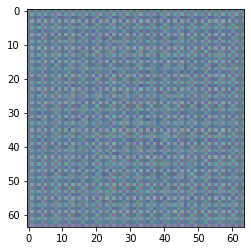

In [ ]:
plt.imshow(output_img.cpu().data.numpy().squeeze(), cmap='gray')

In [ ]:
save_image(output_img[0], save_img, nrow=1, padding=0)
print ('Generated image save to {}'.format(save_img))
print ('Time taken for the task : {}'.format(time.time() - start_time))

TypeError: ignored